In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data=pd.read_csv('credit_card.csv')
df=data.copy()
df.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


In [3]:
df.dtypes

CUST_ID                    object
BALANCE                   float64
PURCHASES                 float64
INSTALLMENTS_PURCHASES    float64
CASH_ADVANCE              float64
CREDIT_LIMIT              float64
PAYMENTS                  float64
MINIMUM_PAYMENTS          float64
TENURE                      int64
dtype: object

In [4]:
df.shape

(8950, 9)

In [6]:
df.isnull().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
TENURE                    0
dtype: int64

In [7]:
df.describe()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,411.067645,978.871112,4494.282473,1733.143852,844.906767,11.517318
std,2081.531879,2136.634782,904.338115,2097.163877,3638.646702,2895.063757,2332.792322,1.338331
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000
25%,128.281915,39.635000,0.000000,0.000000,1600.000000,383.276166,170.857654,12.000000
50%,873.385231,361.280000,89.000000,0.000000,3000.000000,856.901546,312.343947,12.000000
75%,2054.140036,1110.130000,468.637500,1113.821139,6500.000000,1901.134317,788.713501,12.000000
max,19043.138560,49039.570000,22500.000000,47137.211760,30000.000000,50721.483360,76406.207520,12.000000


In [20]:
X=df.drop('CUST_ID',axis=1)
X.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


In [24]:
from sklearn.cluster import KMeans

In [28]:
from sklearn.cluster import KMeans
kmean= KMeans(n_clusters=5, random_state=0)
kmean.fit(X)

KMeans(n_clusters=5, random_state=0)

In [30]:
kmean.labels_

array([0, 4, 1, ..., 0, 0, 0])

In [31]:
pred=X.copy()
pred['kmeans1']=kmean.labels_
pred.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmeans1
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,0
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,4
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,1
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,1
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,0


In [32]:
pred['kmeans1'].value_counts()

0    5442
1    2461
4     882
3     109
2      56
Name: kmeans1, dtype: int64

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler()

In [35]:
new=scaler.fit_transform(X)

In [36]:
new

array([[2.14779454e-03, 1.94536779e-03, 4.24000000e-03, ...,
        3.97863135e-03, 1.82564563e-03, 1.00000000e+00],
       [1.68169097e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.08933873e-02, 1.40344791e-02, 1.00000000e+00],
       [1.31026136e-01, 1.57662475e-02, 0.00000000e+00, ...,
        1.22643641e-02, 8.20961806e-03, 1.00000000e+00],
       ...,
       [1.22871936e-03, 2.94456089e-03, 6.41777778e-03, ...,
        1.60229492e-03, 1.07843629e-03, 0.00000000e+00],
       [7.06688341e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.03604933e-03, 7.29475795e-04, 0.00000000e+00],
       [1.95717777e-02, 2.22932216e-02, 0.00000000e+00, ...,
        1.24533826e-03, 1.15527021e-03, 0.00000000e+00]])

In [41]:
col_names=["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]

In [42]:
scaled=pd.DataFrame(columns=col_names,data=new)

In [43]:
scaled.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0.002148,0.001945,0.00424,0.000000,0.031720,0.003979,0.001826,1.0
1,0.168169,0.000000,0.00000,0.136685,0.232053,0.080893,0.014034,1.0
2,0.131026,0.015766,0.00000,0.000000,0.248748,0.012264,0.008210,1.0
3,0.087521,0.030567,0.00000,0.004366,0.248748,0.000000,0.004088,1.0
4,0.042940,0.000326,0.00000,0.000000,0.038397,0.013374,0.003204,1.0


In [44]:
kmean2=KMeans(n_clusters=5, random_state=0)

In [45]:
kmean2.fit(scaled)

KMeans(n_clusters=5, random_state=0)

In [46]:
kmean2.labels_

array([2, 0, 0, ..., 1, 1, 1])

In [47]:
pred['kmean2']=kmean2.labels_
pred.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmeans1,kmean2
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,0,2
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,4,0
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,1,0
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,1,0
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,0,2


In [48]:
cost=[]
for k in range(1,15):
    kmeanModel=KMeans(n_clusters=k,random_state=0).fit(scaled)
    cost.append([k,kmeanModel.inertia_])

In [51]:
cost

[[1, 770.9083010722921],
 [2, 382.44088620697397],
 [3, 259.8462478906296],
 [4, 221.90778665101385],
 [5, 187.9293924488222],
 [6, 167.71482942567],
 [7, 153.16898941363806],
 [8, 141.2464397986617],
 [9, 134.82126714399564],
 [10, 122.93725109782945],
 [11, 117.16711418308823],
 [12, 112.66997659412785],
 [13, 107.76257269085856],
 [14, 103.29063425536947]]

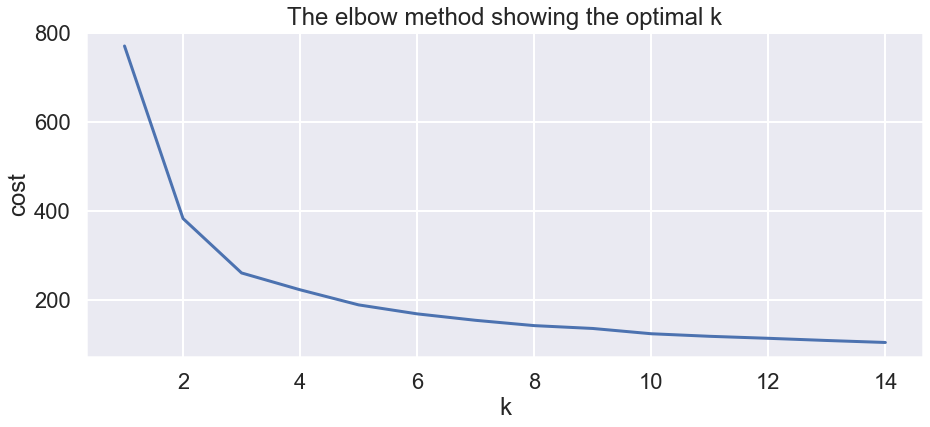

In [52]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pd.DataFrame(cost)[0], pd.DataFrame(cost)[1])
plt.xlabel('k')
plt.ylabel('cost')
plt.title('The elbow method showing the optimal k')
plt.show()

In [59]:
from sklearn.metrics import silhouette_score

In [65]:
s_score=[]
for k in range(2,15):
    Kmean=KMeans(n_clusters=k,random_state=0).fit(scaled)
    s_score.append([k,silhouette_score(scaled,Kmean.labels_)])

In [66]:
s_score

[[2, 0.6924390439486894],
 [3, 0.5061589775989301],
 [4, 0.3905378421218057],
 [5, 0.4005767083037365],
 [6, 0.41941344335972913],
 [7, 0.4212480165790325],
 [8, 0.4250056118549086],
 [9, 0.36003616109296893],
 [10, 0.3310310679455718],
 [11, 0.328882434128413],
 [12, 0.3300206539168908],
 [13, 0.323538688772363],
 [14, 0.3108059623854298]]

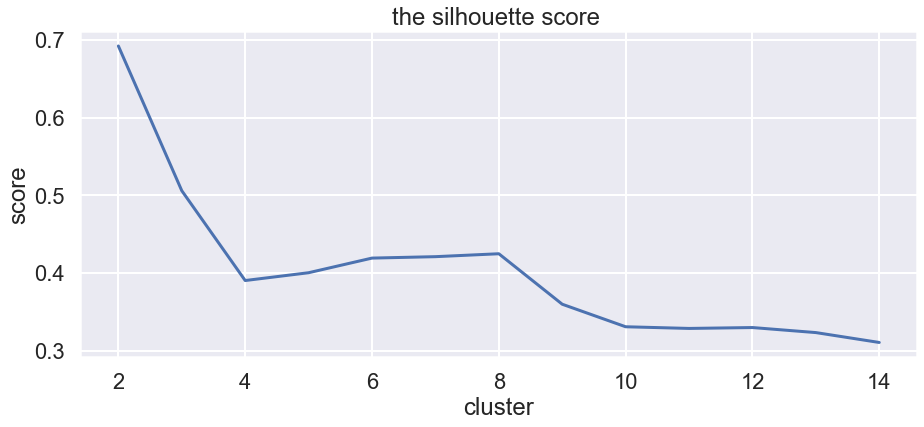

In [67]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pd.DataFrame(s_score)[0],pd.DataFrame(s_score)[1])
plt.xlabel('cluster')
plt.ylabel('score')
plt.title('the silhouette score ')
plt.show()

In [68]:
kmean3=KMeans(n_clusters=3,random_state=0)
kmean3.fit(scaled)
pred['kmean3']=kmean3.labels_

In [69]:
pred.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmeans1,kmean2,kmean3
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,0,2,0
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,4,0,2
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,1,0,2
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,1,0,0
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,0,2,0


In [70]:
pred['kmean3'].value_counts()

0    6479
2    1707
1     764
Name: kmean3, dtype: int64

In [71]:
p_ = pred[["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE",'kmean3']]
pivoted = p_.groupby('kmean3')["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"].median().reset_index()
pivoted


<ipython-input-71-a80d7e586c32>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pivoted = p_.groupby('kmean3')["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"].median().reset_index()


,kmean3,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0,559.917793,347.55,96.00,0.000000,2725.0,702.068789,259.351800,12
1,1,486.084834,179.50,0.00,451.892161,1500.0,324.621485,195.124764,7
2,2,4282.043906,741.02,113.72,1424.442602,9000.0,2055.673322,1242.754558,12
